A Superstore is a self-service shop offering a wide variety of food and household merchandise, organized into sections. It is larger and has a wider selection than a traditional grocery store, and is often situated in a large shopping mall. Superstore/Supermarkets typically offer products such as meat, fresh produce, dairy, baked goods, canned goods, frozen foods, and dry goods. Some supermarkets also offer non-food items such as health and beauty products, household cleaners, and clothing.

# Importing the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


# About this file
## This data was gathered during last year's campaign.
### Data description is as follows;

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* ID - Unique ID of each customer
* Year_Birth - Age of the customer
* Complain - 1 if the customer complained in the last 2 years
* Dt_Customer - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - the amount spent on fish products in the last 2 years
* MntMeatProducts - the amount spent on meat products in the last 2 years
* MntFruits - the amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - the amount spent on wine products in the last 2 years
* MntGoldProds - the amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through the company's website
* NumWebVisitsMonth - number of visits to company's website in the last month
* Recency - number of days since the last purchase*

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T  #here T - transposes the indexes and columns

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

# Feature Engineering

In [7]:
df.set_index('Id',inplace=True)

In [8]:
yr = 2023
df['Age'] = yr-df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [9]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
Id,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62
10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65
1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34


In [10]:
df.describe(include='O')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [11]:
df['Income'].fillna(round(df['Income'].mean()),inplace=True)

In [12]:
df['Income'] = df['Income'].astype('int')

In [13]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
Age                    0
dtype: int64

In [14]:
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                          int32
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Age                             int64
dtype: object

In [15]:
df.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52247.248661,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0


In [16]:
len(df)

2240

# Correlation Matrix

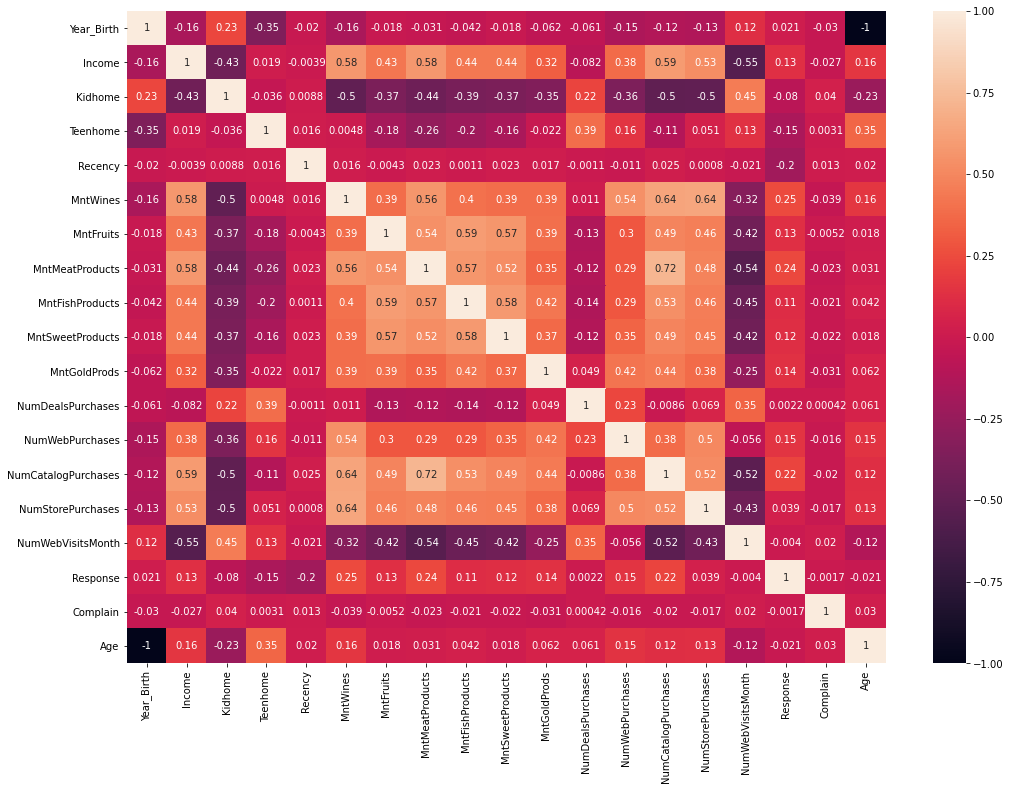

In [17]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df = df.drop(['Dt_Customer','Year_Birth'],1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
Id,,,,,,,,,,,,,,,,,,,,
1826,Graduation,Divorced,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53
1,Graduation,Single,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62
10476,Graduation,Married,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65
1386,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
5371,Graduation,Single,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34


In [19]:
num = df.select_dtypes(np.number)
cat = df.select_dtypes(object)

In [20]:
len(num.columns)

18

# Checking of Normality

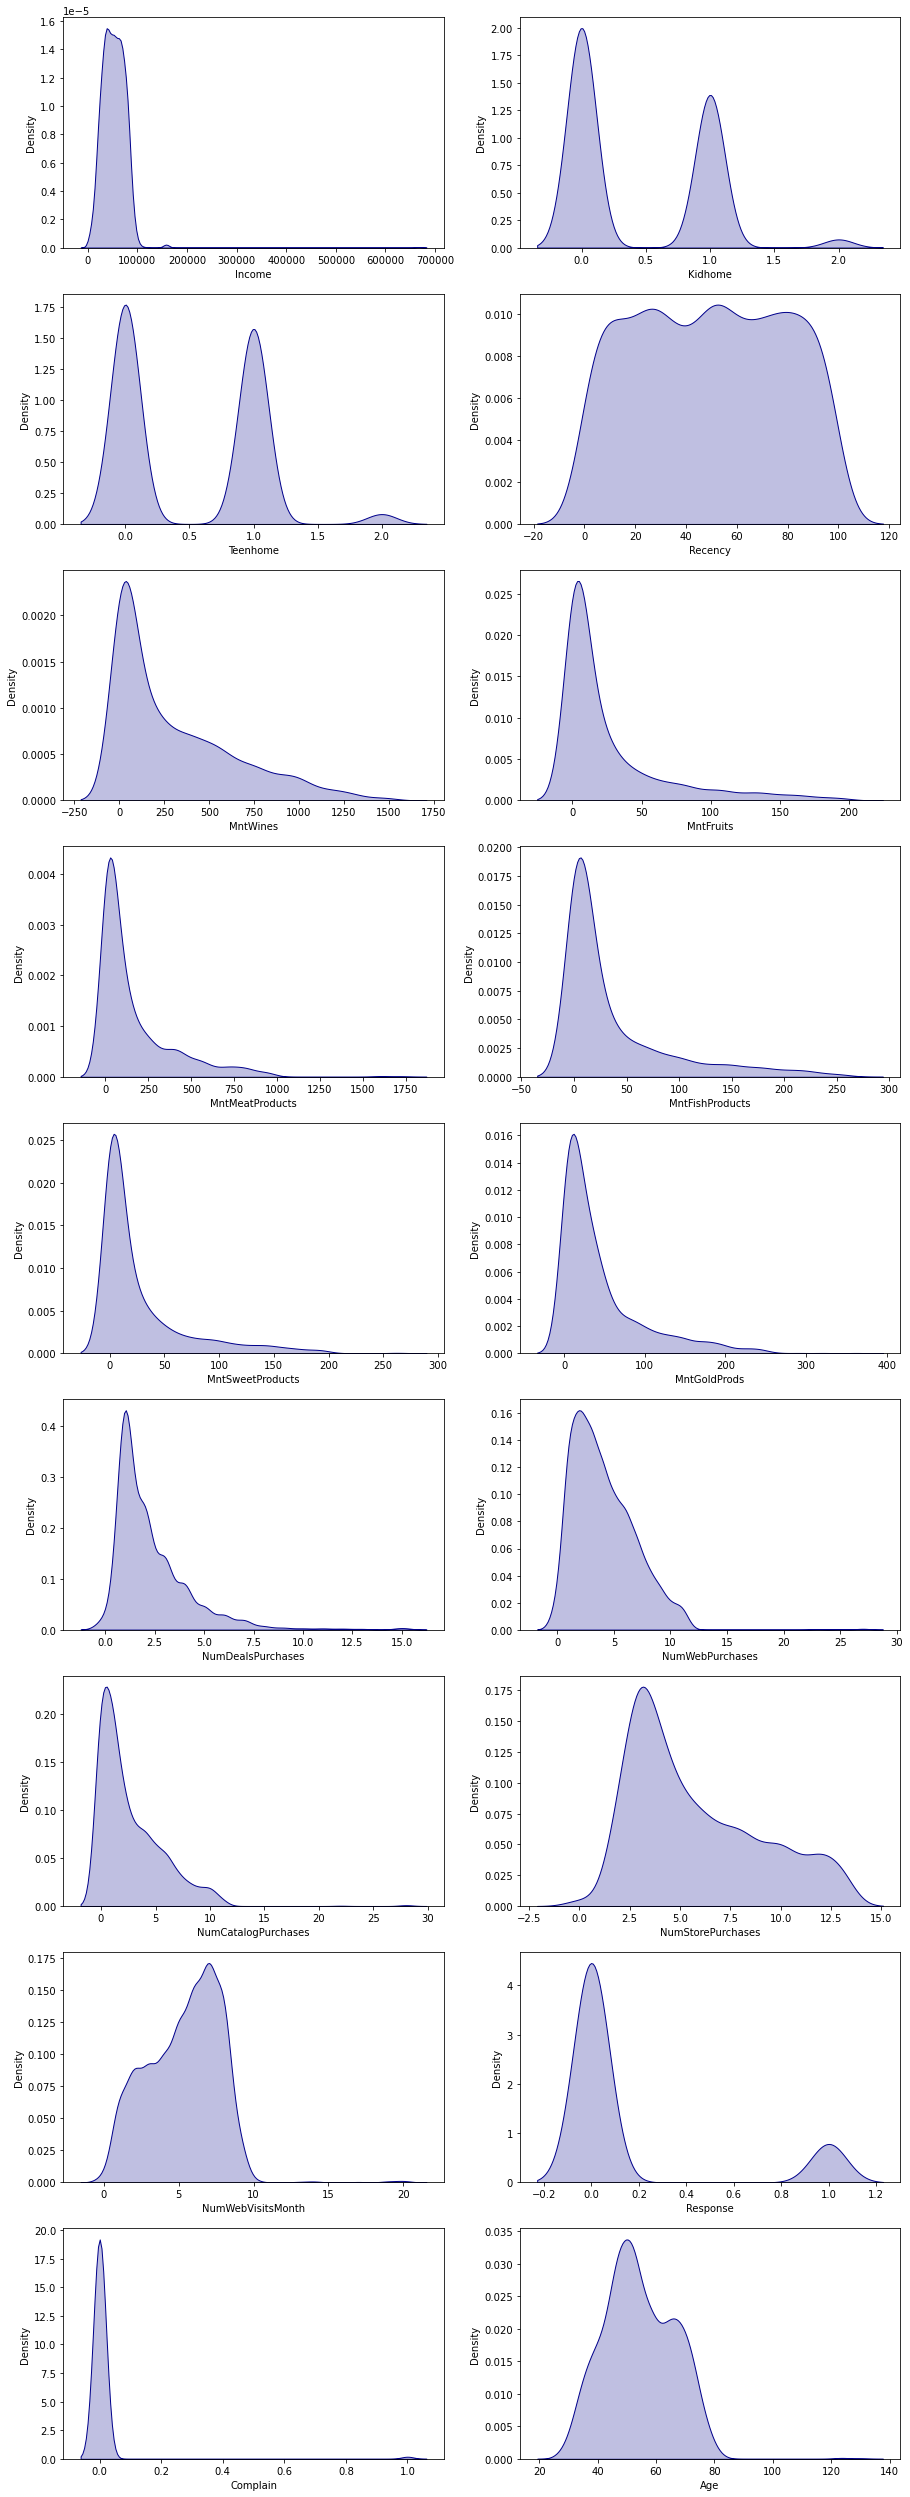

In [21]:
plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(10,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

In [22]:
df.skew()

Income                  6.799965
Kidhome                 0.635288
Teenhome                0.407115
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
Response                1.971555
Complain               10.188972
Age                     0.349944
dtype: float64

Checking for skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.

* -1 --> Left skewed
* 0 --> Normal distribution
* 1 --> Right skewed

# Outlier Treatment

Seems some columns are skewed a lot, removal of the outliers will normalize a data bit

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
Id,,,,,,,,,,,,,,,,,,,,
10476,Graduation,Married,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65
1386,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1991,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
4047,PhD,Married,65324,0,1,0,384,0,102,21,32,5,3,6,2,9,4,0,0,69
9477,PhD,Married,65324,0,1,0,384,0,102,21,32,5,3,6,2,9,4,0,0,69


In [29]:
df['Income'].max()

90933

In [30]:
df['Age'].max()

83

# KMean Clustering

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

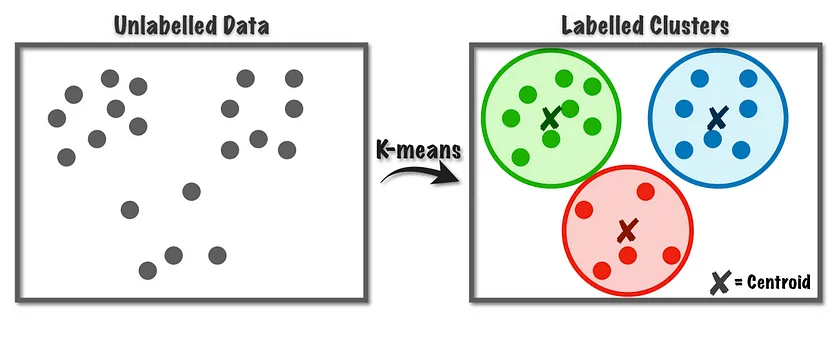

In [27]:
df = df[df['Age']<65]
df = df.reset_index(drop=True)
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56


In [28]:
ds = df.copy()
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,Graduation,Married,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,Graduation,Married,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


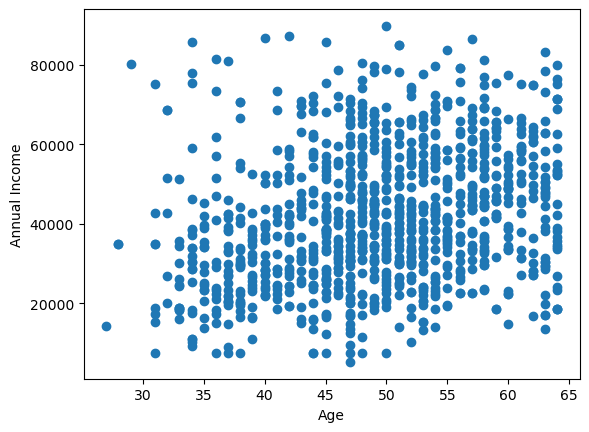

In [29]:
plt.scatter(ds['Age'],ds['Income'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [30]:
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,Graduation,Married,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,Graduation,Married,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [31]:
x = ds[['Income','Age']]

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [34]:
kmeans.cluster_centers_

array([[2.46159974e+04, 4.67293814e+01],
       [6.47607491e+04, 5.19741697e+01],
       [4.29045612e+04, 5.00311751e+01]])

In [35]:
from sklearn.cluster import KMeans

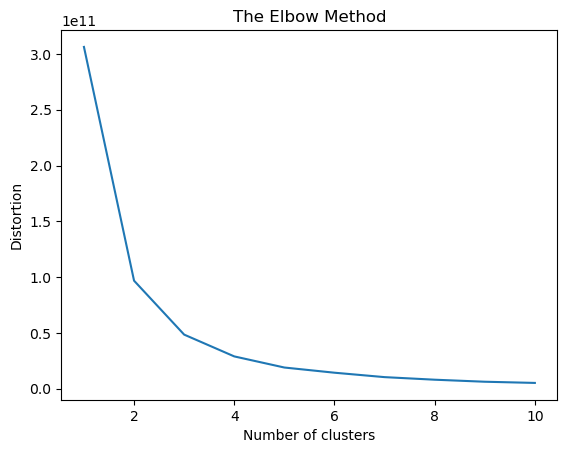

In [36]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

In [38]:
y_predict

array([0, 2, 1, ..., 1, 0, 2], dtype=int32)

In [39]:
ds['Cluster'] = y_predict
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Cluster
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56,0
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56,2
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44,1
3,Graduation,Married,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42,0
4,Graduation,Married,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46,1


In [40]:
df.Marital_Status.unique()

array(['Together', 'Married', 'Single', 'Divorced', 'YOLO', 'Alone',
       'Widow'], dtype=object)

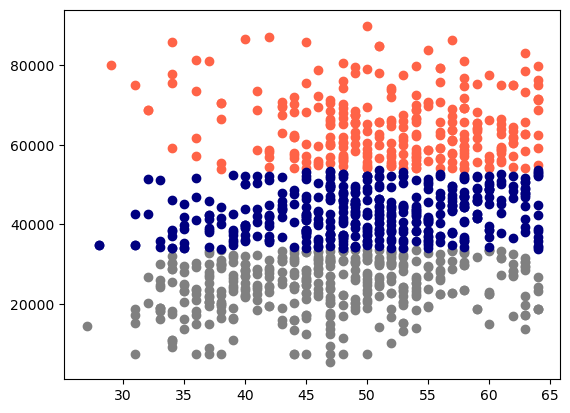

In [41]:
df1 = ds[ds['Cluster']==0]
df2 = ds[ds['Cluster']==1]
df3 = ds[ds['Cluster']==2]
plt.scatter(df1['Age'],df1['Income'],color='grey')
plt.scatter(df2['Age'],df2['Income'],color='tomato')
plt.scatter(df3['Age'],df3['Income'],color='navy')
plt.show()

In [42]:
ds.head(1)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Cluster
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56,0


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
ds['Education'] = le.fit_transform(ds['Education'])
ds['Marital_Status'] = le.fit_transform(ds['Marital_Status'])

In [45]:
ds.drop(['Cluster'],axis=1,inplace=True)
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,2,4,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,2,4,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,3,4,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,2,2,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,2,2,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [46]:
from sklearn.preprocessing import Normalizer # MaxAbsScaler #RobustScaler, 

In [47]:
scr = Normalizer()
scr.fit(ds)
ds = pd.DataFrame(scr.transform(ds),columns=ds.columns)

In [48]:
ds.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,0.000062,0.000123,0.999998,0.000031,0.000031,0.0,0.000308,0.000000,0.000031,0.000000,0.000000,0.000000,0.000031,0.000031,0.000000,0.000062,0.000216,0.0,0.0,0.001724
1,0.000045,0.000089,0.999998,0.000000,0.000022,0.0,0.001736,0.000000,0.000245,0.000000,0.000000,0.000156,0.000022,0.000045,0.000022,0.000067,0.000111,0.0,0.0,0.001246
2,0.000048,0.000064,0.999997,0.000016,0.000000,0.0,0.002240,0.000064,0.000976,0.000000,0.000208,0.000064,0.000032,0.000048,0.000016,0.000096,0.000064,0.0,0.0,0.000704
3,0.000074,0.000074,0.999998,0.000000,0.000000,0.0,0.000112,0.000372,0.000298,0.000112,0.000595,0.001191,0.000037,0.000037,0.000037,0.000074,0.000223,0.0,0.0,0.001563
4,0.000036,0.000036,0.999998,0.000018,0.000018,0.0,0.001149,0.000109,0.001040,0.000237,0.000237,0.000401,0.000073,0.000036,0.000018,0.000091,0.000073,0.0,0.0,0.000839


In [49]:
x = ds[['Age','Income']]
x.head(2)

,Age,Income
0,0.001724,0.999998
1,0.001246,0.999998


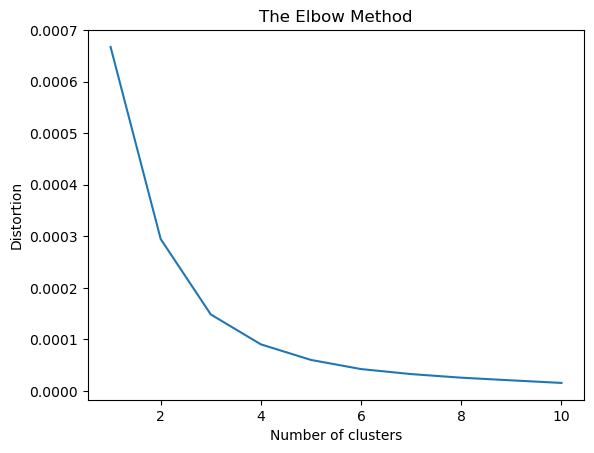

In [50]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [51]:
km = KMeans(n_clusters=3,random_state=42)
y_pred = km.fit_predict(x)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [52]:
ds['Cluster'] = y_pred
ds.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Cluster
0,0.000062,0.000123,0.999998,0.000031,0.000031,0.0,0.000308,0.0,0.000031,0.0,0.0,0.000000,0.000031,0.000031,0.000000,0.000062,0.000216,0.0,0.0,0.001724,0
1,0.000045,0.000089,0.999998,0.000000,0.000022,0.0,0.001736,0.0,0.000245,0.0,0.0,0.000156,0.000022,0.000045,0.000022,0.000067,0.000111,0.0,0.0,0.001246,1


In [53]:
km.cluster_centers_[:,1]

array([0.99999275, 0.99997927, 0.99996646])

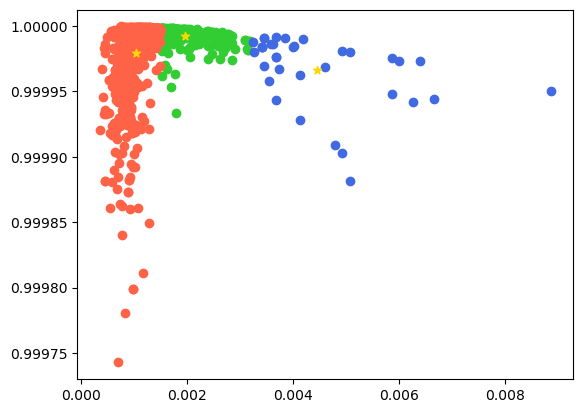

In [54]:
df1 = ds[ds['Cluster']==0]
df2 = ds[ds['Cluster']==1]
df3 = ds[ds['Cluster']==2]
plt.scatter(df1['Age'],df1['Income'],color='limegreen')
plt.scatter(df2['Age'],df2['Income'],color='tomato')
plt.scatter(df3['Age'],df3['Income'],color='royalblue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='gold',marker='*',label='centroid')
plt.show()

In [55]:
kmean_score = silhouette_score(x, y_pred)*100
kmean_score

60.233050731842766

In [56]:
ds.drop(['Cluster'],axis=1,inplace=True)

# KMean using PCA

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=2,random_state=42,whiten=True)
df_pca = pca.fit_transform(ds)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1
0,-0.668506,-1.284791
1,-0.296938,-1.282684
2,-0.121087,-1.298257
3,-0.686726,-1.098635
4,-0.382604,-1.258867


In [59]:
km = KMeans(n_clusters=3,random_state=42)
y_pred = km.fit_predict(df_pca)
y_pred

array([1, 1, 1, ..., 0, 2, 1], dtype=int32)

In [60]:
kmean_pca = silhouette_score(df_pca, y_pred)*100
kmean_pca

53.67909931127986

In [61]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.79004749, 0.09893623])

In [62]:
sum(var_exp*100)

88.89837150108984

In [63]:
cum_var = np.cumsum(var_exp)
cum_var

array([0.79004749, 0.88898372])

In [64]:
cum_var*100

array([79.00474878, 88.8983715 ])

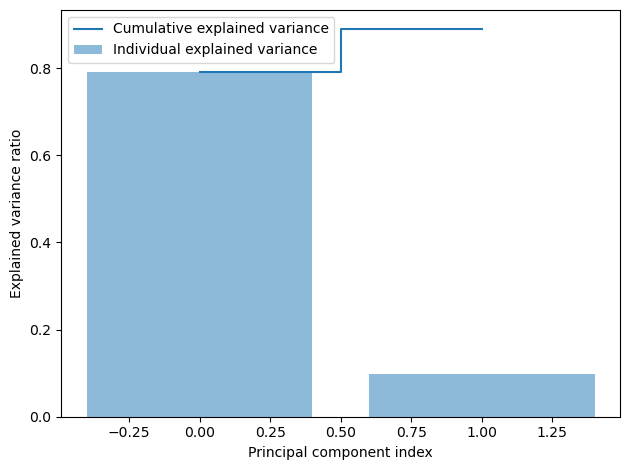

In [65]:
plt.bar(range(0,len(var_exp)),var_exp,alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_var)), cum_var,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# PCA Based on Education 

In [66]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,Graduation,Married,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,Graduation,Married,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [67]:
dd = df.copy()
ds = df.copy()
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,Graduation,Married,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,Graduation,Married,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
ds['Education'] = le.fit_transform(ds['Education'])
ds['Marital_Status'] = le.fit_transform(ds['Marital_Status'])
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,2,4,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,2,4,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,3,4,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,2,2,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,2,2,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [70]:
from sklearn.preprocessing import Normalizer

In [71]:
scr = Normalizer()
scr.fit(ds)
ds = pd.DataFrame(scr.transform(ds),columns=ds.columns)

In [72]:
ds.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,0.000062,0.000123,0.999998,0.000031,0.000031,0.0,0.000308,0.0,0.000031,0.0,0.0,0.000000,0.000031,0.000031,0.000000,0.000062,0.000216,0.0,0.0,0.001724
1,0.000045,0.000089,0.999998,0.000000,0.000022,0.0,0.001736,0.0,0.000245,0.0,0.0,0.000156,0.000022,0.000045,0.000022,0.000067,0.000111,0.0,0.0,0.001246


In [73]:
pca = PCA(n_components=3,random_state=42)
df_pca = pca.fit_transform(ds)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2
0,-0.002648,-0.001801,-0.000362
1,-0.001176,-0.001798,-0.000445
2,-0.000480,-0.001820,0.000167
3,-0.002720,-0.001540,0.000243
4,-0.001516,-0.001765,0.000578


In [74]:
dd.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44


In [75]:
df_pca['Education'] = dd['Education']

In [76]:
df_pca.isna().sum()

0            0
1            0
2            0
Education    0
dtype: int64

In [77]:
df_pca.rename(columns={0: "pc1", 1: "pc2", 2: "pc3"},inplace=True)
df_pca.head()

,pc1,pc2,pc3,Education
0,-0.002648,-0.001801,-0.000362,Graduation
1,-0.001176,-0.001798,-0.000445,Graduation
2,-0.000480,-0.001820,0.000167,Master
3,-0.002720,-0.001540,0.000243,Graduation
4,-0.001516,-0.001765,0.000578,Graduation


In [78]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.79004749, 0.09893623, 0.06482958])

In [79]:
sum(var_exp)*100

95.38132918196105

In [80]:
cum_var = np.cumsum(var_exp)
cum_var

array([0.79004749, 0.88898372, 0.95381329])

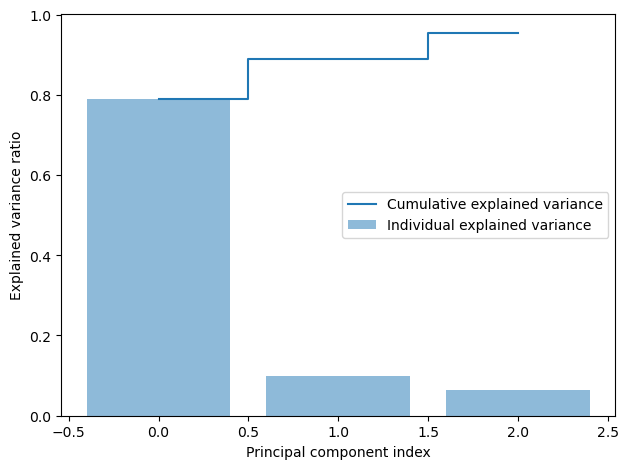

In [81]:
plt.bar(range(0,len(var_exp)),var_exp,alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_var)), cum_var,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [82]:
fig = px.scatter_3d(df_pca, x='pc1', y='pc2', z='pc3',color='Education')
fig.show()

# Hierarchical

Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.

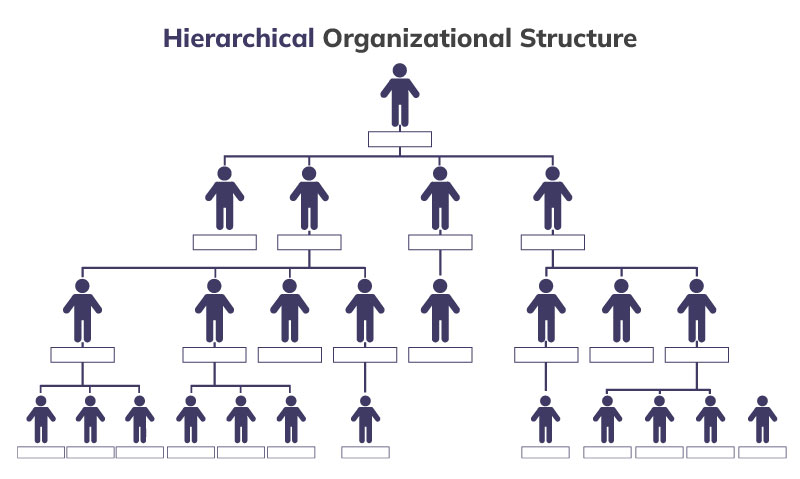

In [83]:
org_h = df.copy()
hd = org_h.copy()
hd.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,Graduation,Married,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,Graduation,Married,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [84]:
le = LabelEncoder()
hd['Education'] = le.fit_transform(hd['Education'])
hd['Marital_Status'] = le.fit_transform(hd['Marital_Status'])
hd.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,2,4,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,2,4,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,3,4,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,2,2,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,2,2,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [85]:
from sklearn.preprocessing import RobustScaler

In [86]:
scr = RobustScaler()
scr.fit(hd)
hd = pd.DataFrame(scr.transform(hd), columns=hd.columns)
hd.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,0.0,1.0,-0.308070,0.0,1.0,-1.02,-0.145310,-0.4,-0.333333,-0.428571,-0.363636,-0.500000,-0.5,-0.333333,-0.5,-0.666667,0.5,0.0,0.0,0.500000
1,0.0,1.0,0.196814,-1.0,1.0,-1.02,0.214003,-0.4,-0.166667,-0.428571,-0.363636,-0.208333,-0.5,0.000000,0.0,-0.333333,-0.5,0.0,0.0,0.500000
2,1.0,1.0,0.908848,0.0,0.0,-1.02,0.541612,0.0,0.666667,-0.428571,0.818182,-0.333333,0.0,0.333333,0.0,0.666667,-1.0,0.0,0.0,-0.500000
3,0.0,0.0,-0.535119,-1.0,0.0,-1.02,-0.182299,0.6,-0.216667,-0.214286,1.090909,0.833333,-0.5,-0.333333,0.0,-0.666667,0.0,0.0,0.0,-0.666667
4,0.0,0.0,0.597171,0.0,1.0,-1.02,0.134742,0.2,0.600000,0.500000,0.818182,0.416667,1.0,0.000000,0.0,0.333333,-1.0,0.0,0.0,-0.333333


In [87]:
pca = PCA(n_components = 2)
fit_pca = pca.fit_transform(hd)
df_pca = pd.DataFrame(fit_pca)
df_pca.columns = ['P1', 'P2']
df_pca.head()

,P1,P2
0,-2.663006,0.118479
1,-1.847984,-0.454584
2,-0.423143,-0.856330
3,-1.186415,1.124288
4,-0.124159,0.185018


In [88]:
import scipy.cluster.hierarchy as shc

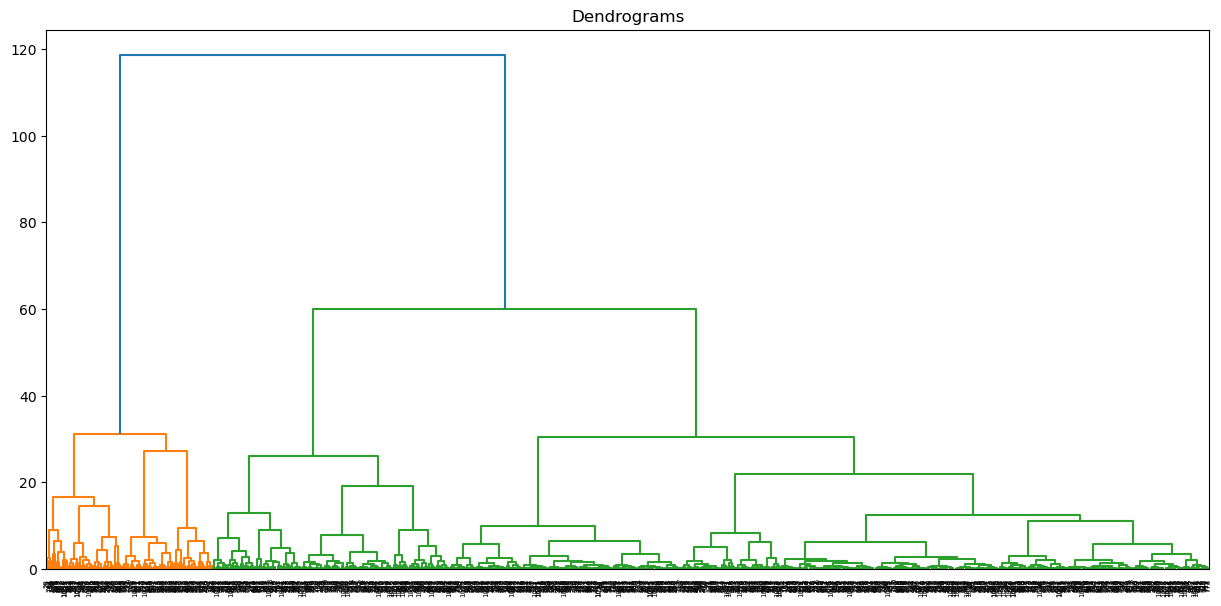

In [89]:
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_pca, method='ward', metric='euclidean'))

# Agglomerative

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

* Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left. 
* Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

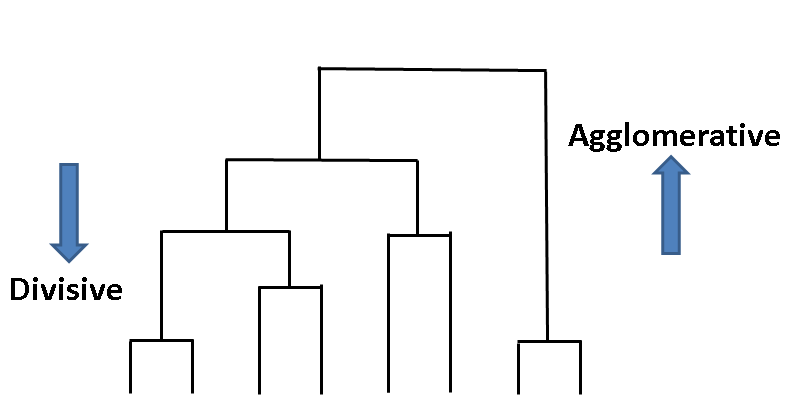

In [90]:
from sklearn.cluster import AgglomerativeClustering

In [91]:
ac = AgglomerativeClustering(n_clusters=2, affinity='l1', linkage='average')  
ac.fit_predict(df_pca)

array([1, 1, 1, ..., 0, 1, 1])

In [92]:
agg_score = silhouette_score(df_pca, ac.labels_)*100
agg_score

64.3200938011822

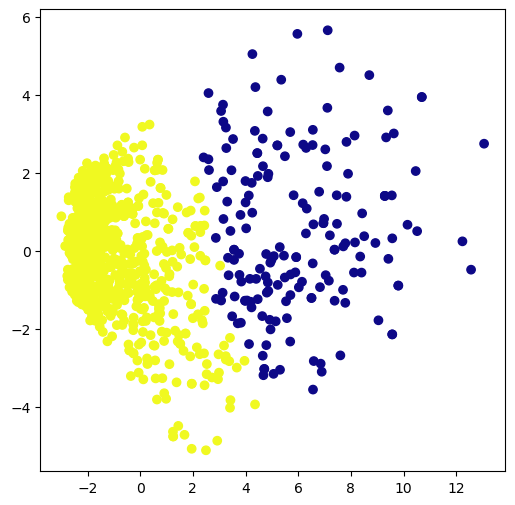

In [93]:
plt.figure(figsize =(6, 6))
plt.scatter(df_pca['P1'], df_pca['P2'],c = ac.labels_, cmap ='plasma')
plt.show()

In [94]:
hd['Marital_Status'] = org_h['Marital_Status']
hd.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,0.0,Together,-0.308070,0.0,1.0,-1.02,-0.145310,-0.4,-0.333333,-0.428571,-0.363636,-0.500000,-0.5,-0.333333,-0.5,-0.666667,0.5,0.0,0.0,0.5
1,0.0,Together,0.196814,-1.0,1.0,-1.02,0.214003,-0.4,-0.166667,-0.428571,-0.363636,-0.208333,-0.5,0.000000,0.0,-0.333333,-0.5,0.0,0.0,0.5


In [95]:
fig = px.scatter_3d(hd, x='Kidhome', y='Age',z='Income',color='Marital_Status')
fig.show()

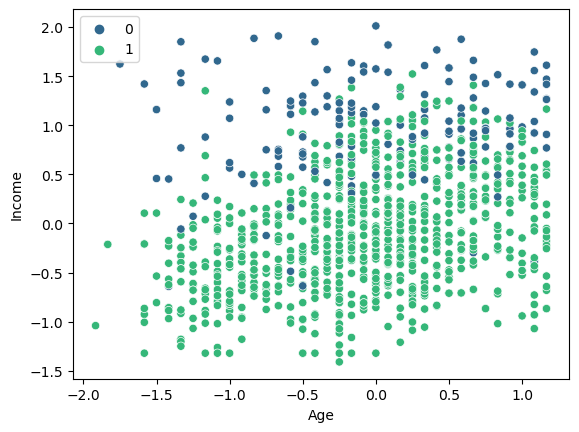

In [96]:
sns.scatterplot(x=hd['Age'],y=hd['Income'],hue=ac.labels_,palette="viridis")
plt.show()

# DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

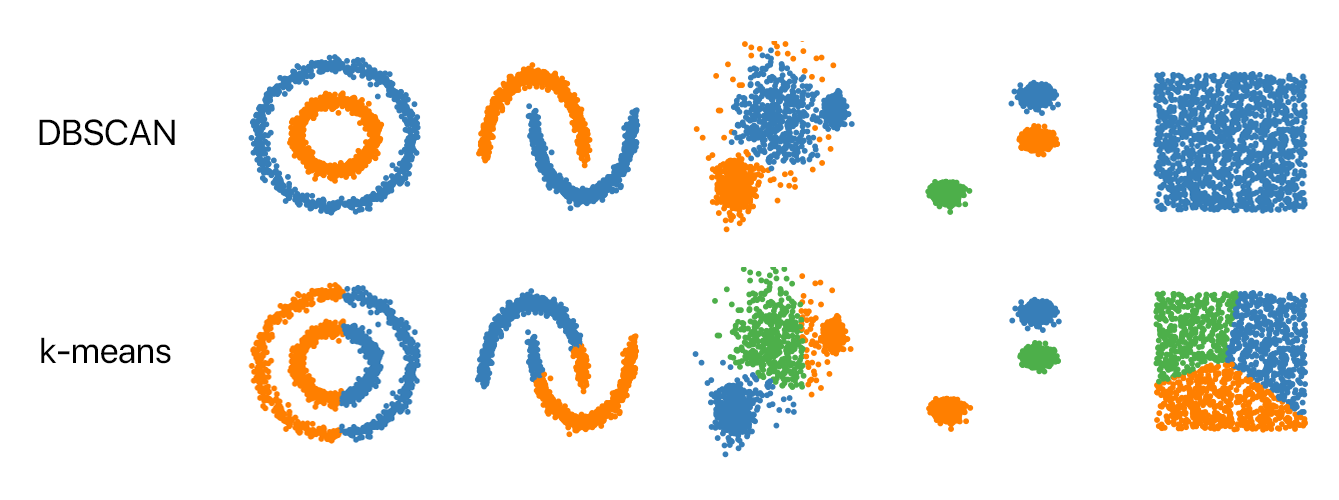

In [97]:
from sklearn.cluster import DBSCAN

In [98]:
db = df.copy()
db.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
1,Graduation,Together,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56
2,Master,Together,62499,1,0,0,140,4,61,0,13,4,2,3,1,6,4,0,0,44
3,Graduation,Married,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,42
4,Graduation,Married,54809,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0,46


In [99]:
db['Education'] = le.fit_transform(db['Education'])
db['Marital_Status'] = le.fit_transform(db['Marital_Status'])

In [100]:
from sklearn.preprocessing import RobustScaler

In [101]:
scr = RobustScaler()
scr.fit(db)
db = pd.DataFrame(scr.transform(db),columns=db.columns)

In [102]:
x = db[['Marital_Status','Age']]

In [103]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.00125, min_samples = 1).fit(x)
clustering.labels_

array([  0,   0,   1, ..., 112,   3, 112])

In [104]:
db_score = silhouette_score(x, clustering.labels_)*100
db_score

99.07063066207178

In [105]:
db['Cluster'] = clustering.labels_
db.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Cluster
0,0.0,1.0,-0.308070,0.0,1.0,-1.02,-0.145310,-0.4,-0.333333,-0.428571,-0.363636,-0.500000,-0.5,-0.333333,-0.5,-0.666667,0.5,0.0,0.0,0.5,0
1,0.0,1.0,0.196814,-1.0,1.0,-1.02,0.214003,-0.4,-0.166667,-0.428571,-0.363636,-0.208333,-0.5,0.000000,0.0,-0.333333,-0.5,0.0,0.0,0.5,0


In [106]:
pd.Series(clustering.labels_).unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140])

In [107]:
x['Cluster'] = clustering.labels_
x.head(2)

,Marital_Status,Age,Cluster
0,1.0,0.5,0
1,1.0,0.5,0


In [108]:
fig = px.scatter_3d(x, x='Marital_Status', y='Cluster',z='Age',color='Marital_Status')
fig.show()

# Accuracy vs Algorithm

In [109]:
models = pd.DataFrame({'Algorithm':['KMean','KMean_PCA','Hierarchical - Agglomerative','DBScan'],
                       'Accuracy':[kmean_score,kmean_pca,agg_score,db_score,]}).sort_values(by=['Accuracy'], ascending=True)
models

,Algorithm,Accuracy
1,KMean_PCA,53.679099
0,KMean,60.233051
2,Hierarchical - Agglomerative,64.320094
3,DBScan,99.070631


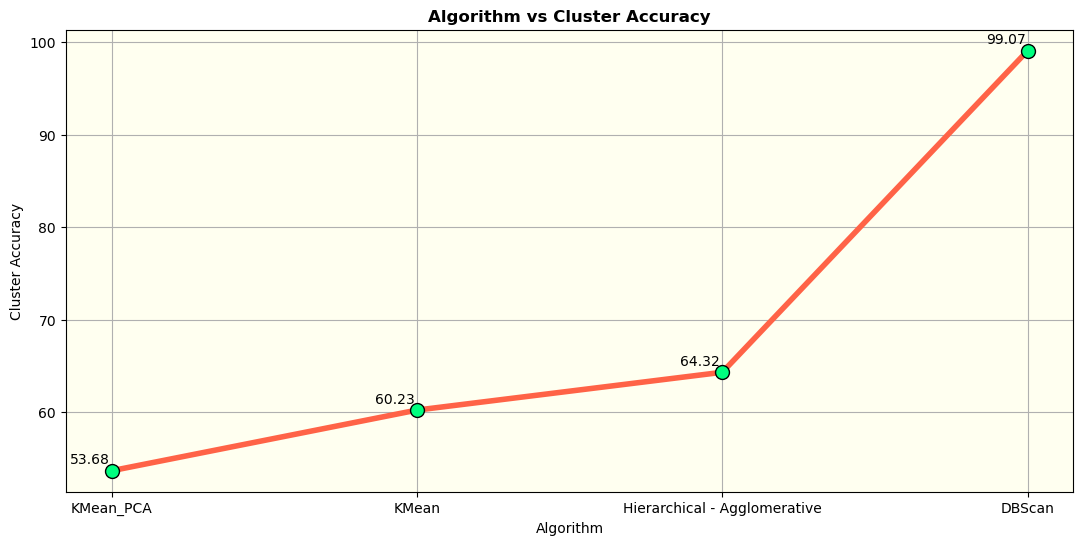

In [110]:
plt.figure(figsize=(13, 6))

plt.title("Algorithm vs Cluster Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Cluster Accuracy")

plt.plot(models.Algorithm,models.Accuracy,marker='o',color='tomato',linewidth=4,markersize=10,
         markerfacecolor='springgreen',markeredgecolor='black') #mediumseagreen
ax = plt.gca()
ax.set_facecolor("ivory")
for x,y in zip(models.Algorithm,models.Accuracy):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-1.5,5),ha='right')
plt.grid()
plt.show()

As you can see clearly the DBScan algorithm works way better than any other algorithm are used, getting 99% accuracy in unsupervised learning is rare and hence unsupervised learning doesn't contain label and proper output. So it's hard for the algorithm to predit the data, anything higher than 60% are considered as good accuracy in unsupervised/clustering.

In [111]:
models.to_csv('/kaggle/working/model_score.csv')